In [4]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepla length', 'sepla width', 'petal length', 'petal width', 'target'])
df

,sepla length,sepla width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepla length', 'sepla width', 'petal length', 'petal width']

x = df.loc[:, features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

In [5]:
x.shape, x

((150, 4),
 array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
         -1.31297673e+00],
        [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
         -1.31297673e+00],
        [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
         -1.31297673e+00],
        [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
         -1.31297673e+00],
        [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
         -1.31297673e+00],
        [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
         -1.05003079e+00],
        [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
         -1.18150376e+00],
        [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
         -1.31297673e+00],
        [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
         -1.31297673e+00],
        [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
         -1.44444970e+00],
        [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
         -1.31297673e+00],
        [-1.26418478e+00,  8.006

In [6]:
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [10]:
pca

PCA(n_components=2)

In [12]:
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
                          , columns = ['principal component 1'
                                       , 'principal componet 2'])

In [13]:
principalDf

,principal component 1,principal componet 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


Populating the interactive namespace from numpy and matplotlib


KeyError: 'principal component 2'

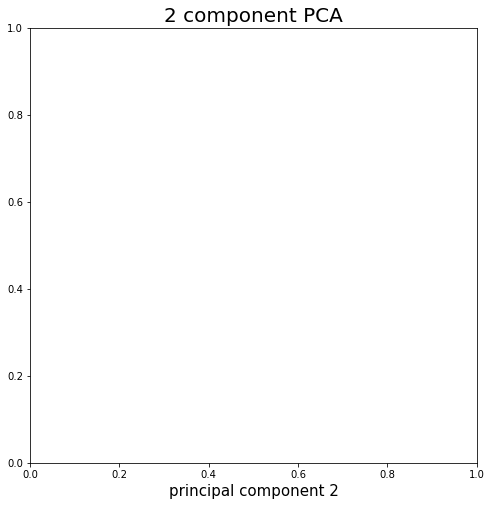

In [15]:
import matplotlib.pyplot as plt
%pylab inline

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_xlabel('principal component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
              , finalDf.loc[indicesToKeep, 'principal component 2']
              , c = color
              , s = 50)             
ax.legend(targets)
ax.grid()